# Data Science - EDA using Titanic Dataset

### 주요 Column 설명
- PassengerId : Passenger's unique number
- Pclass : 객실 class(1st class, 2nd class, 3rd class)
- SibSp : Sibling + Spouse (동승한 형제자매 + 배우자)
- Parch : Parents + Children (함께 탑승한 부모, 아이의 수)
- Ticket : Ticket number
- Fare : 탑승 요금
- Cabin : 객실 번호 (그러나 공백도 많고 정확한 기준을 알 수 없음)
- Embarked : 탑승 항구 (C=Cherbourg, Q=Queenstown, S=Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한국어 폰트 깨짐 문제 해결
rc('font', family='AppleGothic') # MacOS에서만 사용, 윈도우에서는 주석 처리 후 아래 줄 주석을 풀 것
# plt.rcParams['font.family'] ='Malgun Gothic' -> 윈도우에서는 위 줄을 지우고 이 코드를 사용
plt.rcParams['axes.unicode_minus'] =False

## 1. Data load

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- 데이터의 크기는 891 rows x 12 columns이다. (Pycharm 기준 df 출력 시 데이터 크기 제공)
- 데이터 식별자는 'PassengerId'이다.

### 결측치 확인

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin에 687개의 결측치가 존재하며, Age에 177개의 결측치가 존재한다.
- Cabin은 결측치가 너무 많아 제거한다.
- Age 또한 결측치가 너무 많으나, 생존율에 영향을 미칠 수 있는 중요한 요소이므로 결측치를 제거하지 않고 보간하여 사용한다.
- Embarked에는 결측치가 2개 뿐이므로, 결측치를 제거하고 진행한다.

In [4]:
df = df.drop('Cabin', axis=1)
df = df.dropna(subset=['Embarked'])

# Age 보간은 1-D에서 진행

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. 가설 검증 및 시각화 프로세스

## 1-A. 항구에 따라 사망자수의 차이가 있다

In [7]:
# 항구 : Embarked(C= Cherbourg, Q= Queenstown, S= Southampton)
# 방법론 : Embarked에서 C가 나온 횟수, Q가 나온 횟수, S가 나온 횟수를 카운트한다.
# 이후, 생존자와 사망자를 구분하여 각 항구별로 사망자수를 카운트한다.
# 이후, 각 항구별로 사망자수를 시각화한다.

death_counts = df.groupby('Embarked')['Survived'].value_counts().dropna()
death_counts

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [8]:
# 탑승 항구와 생존 여부를 그룹화하고, 각 그룹의 크기를 계산
grouped = df.groupby(['Embarked', 'Survived']).size().unstack()  # 각 그룹의 크기 계산 이후 결과를 Dataframe으로 변환

# 생존자와 사망자 분리
survivors = grouped[1]
non_survivors = grouped[0]

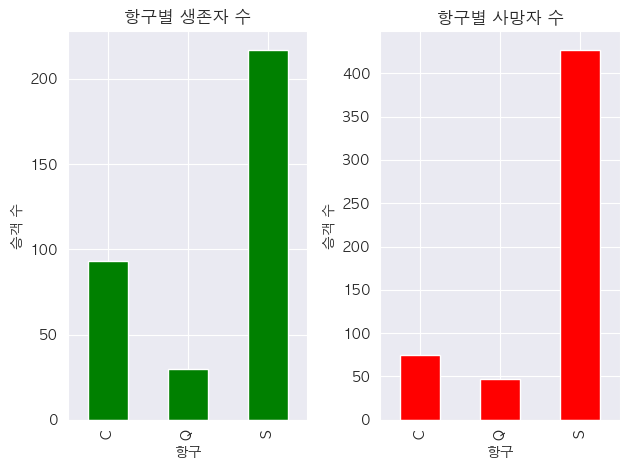

In [9]:
fig, axs = plt.subplots(1, 2)

# 항구별 생존자 수
survivors.plot(kind='bar', stacked=True, color='g', ax=axs[0])
axs[0].set_title('항구별 생존자 수')
axs[0].set_xlabel('항구')
axs[0].set_ylabel('승객 수')

# 항구별 사망자 수
non_survivors.plot(kind='bar', stacked=True, color='r', ax=axs[1])
axs[1].set_title('항구별 사망자 수')
axs[1].set_xlabel('항구')
axs[1].set_ylabel('승객 수')

# 레이아웃 조정
plt.tight_layout()
plt.show()

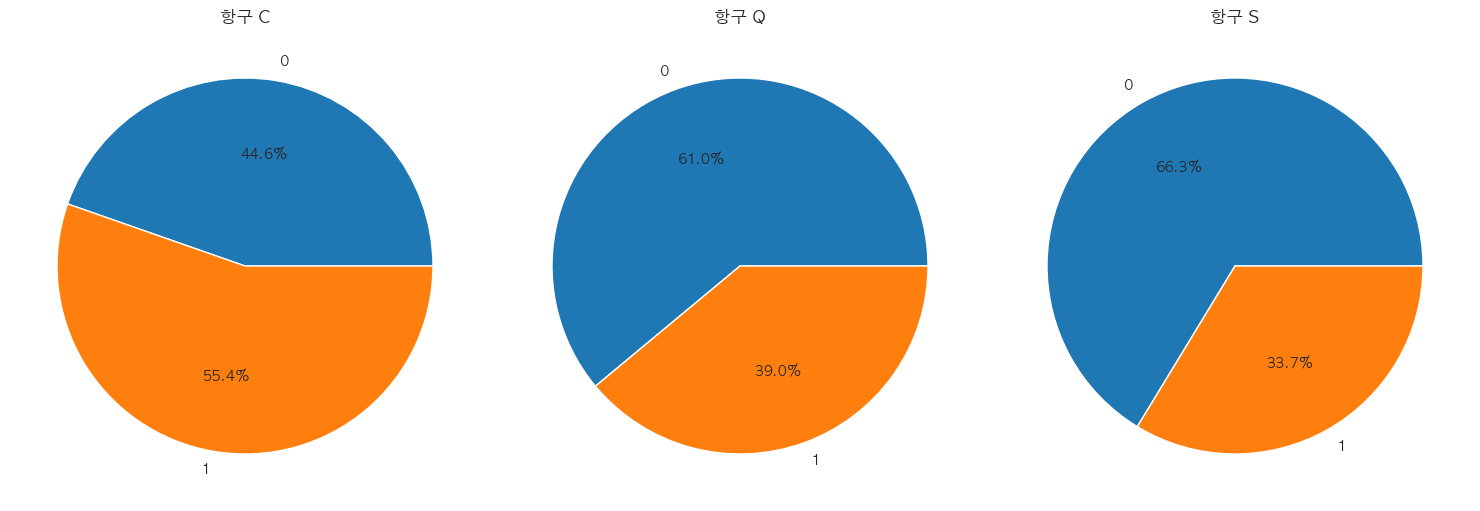

In [10]:
# 항구와 생존 상태에 따른 데이터 피벗 테이블 생성
pivot = df.pivot_table(index='Embarked', columns='Survived', aggfunc='size', fill_value=0)

# 각 항구별로 파이 차트 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, port in enumerate(pivot.index):
    axs[i].pie(pivot.loc[port], labels=pivot.columns, autopct='%1.1f%%')
    axs[i].set_title(f'항구 {port}')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### Insight.
- Bar 그래프로 볼 때는 Southampton에서 탑승한 승객의 사망자가 가장 많고, Southampton에서 탑승한 승객의 생존자도 가장 많았으므로, Southampton 항구에서 탑승한 승객이 사망 확률이 높다고 보기 어려울 것으로 예측되었다.
- 하지만 Pie 그래프로 항구별 사망자/생존자 비율을 볼 때는 <strong>Southampton에서 탑승한 승객의 사망자 비율</strong>이 가장 높았다. 따라서 Southampton에서 탑승한 승객이 사망 확률이 높다고 볼 수 있다.
- 탑승자의 항구별 사망률은 각각 Cherbourg, Queenstown, Southampton 순으로 44.6%, 61.0%, 66.3% 이었다.
- 추가로 사망자가 가장 많이 발생한 항구는 Southampton이었다.


## 1-B. 남성일 경우 사망자가 많다

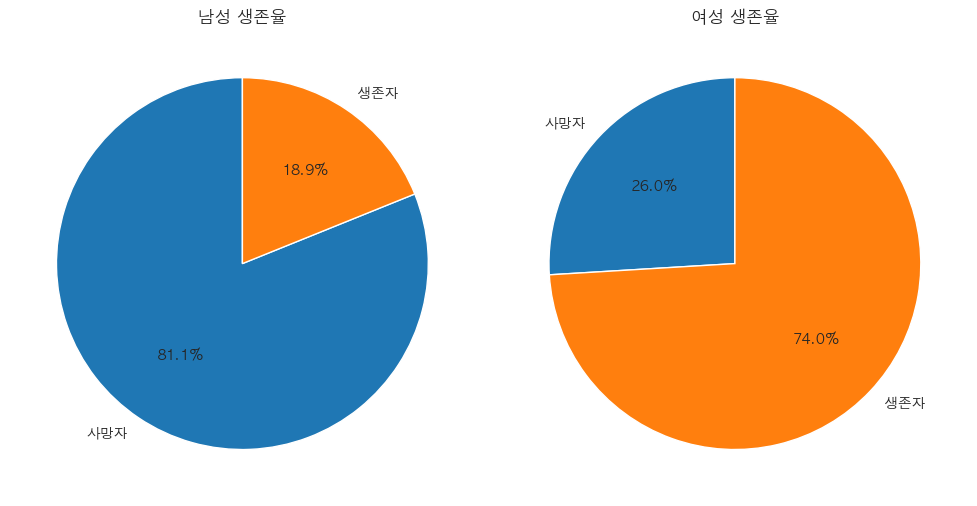

In [11]:
# 성별과 생존 상태에 따라 그룹화하고, 각 그룹의 크기 계산
grouped = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 각 성별에 대한 결과를 파이 차트로 표시
labels = ['사망자', '생존자']

# 남성 파이 차트
axs[0].pie(grouped.loc['male'], labels=labels, autopct='%1.1f%%', startangle=90)  # 파이 차트 생성
axs[0].set_title('남성 생존율')

# 여성 파이 차트
axs[1].pie(grouped.loc['female'], labels=labels, autopct='%1.1f%%', startangle=90)  # 파이 차트 생성
axs[1].set_title('여성 생존율')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### Insight.
- 압도적으로 남성 사망자 수가 더 많았다.

### 추가로 궁금한 점 : 1등급 남성 승객 사망자도 많은가 (즉, 등급별로 사망자 추이가 차이가 나지는 않는가)

객실 등급별 생존율
 Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64


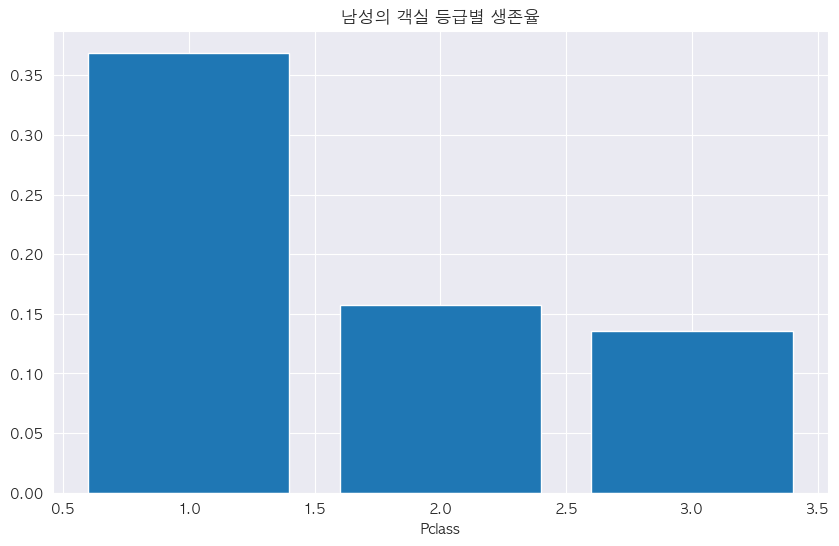

In [12]:
df_male = df[df['Sex'] == 'male']  # 남성 승객만 추출
grouped = df_male.groupby(['Pclass', 'Survived']).size().unstack()  # 객실 등급과 생존 상태에 따라 그룹화하고, 각 그룹의 크기 계산
survivor_rate = grouped[1] / (grouped[0] + grouped[1])  # 생존자 / 생존자 + 사망자

print("객실 등급별 생존율\n", survivor_rate)

# 생존율 시각화
plt.figure(figsize=(10, 6))
plt.bar(survivor_rate.index, survivor_rate)  # 막대 그래프 생성
plt.xlabel('Pclass')
plt.title('남성의 객실 등급별 생존율')
plt.show()

- 추가로 1등급 남성 승객이 여성 승객보다 생존율이 높을지 확인해 본다.

Survivor rate: Pclass
1    0.967391
2    0.921053
3    0.500000
dtype: float64


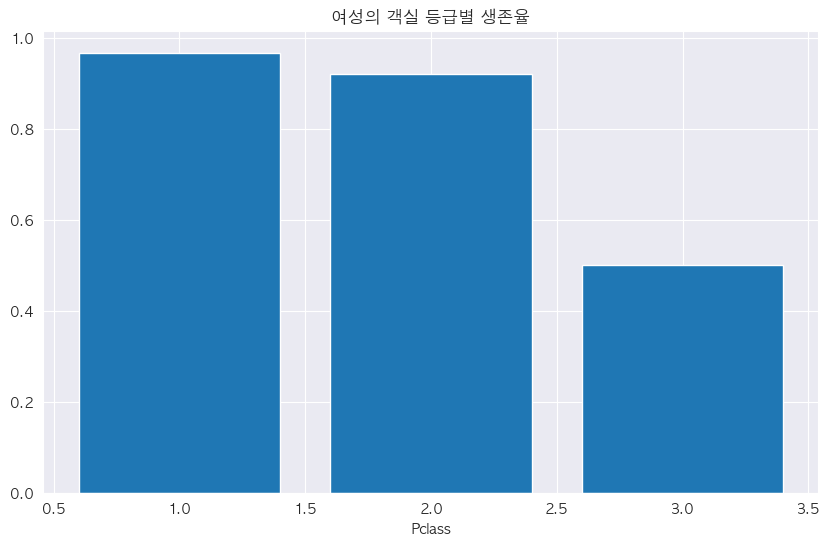

In [13]:
df_female = df[df['Sex'] == 'female']  # 여성 승객만 추출
grouped = df_female.groupby(['Pclass', 'Survived']).size().unstack()  # 객실 등급과 생존 상태에 따라 그룹화하고, 각 그룹의 크기 계산
survivor_rate = grouped[1] / (grouped[0] + grouped[1])  # 생존자 / 생존자 + 사망자

print("Survivor rate:", survivor_rate)

# 생존율 시각화
plt.figure(figsize=(10, 6))
plt.bar(survivor_rate.index, survivor_rate)  # 막대 그래프 생성
plt.xlabel('Pclass')
plt.title('여성의 객실 등급별 생존율')
plt.show()

### Insight.
- 실제로 객실 등급 별로 사망자 수가 차이가 나는 모습을 확인 할 수 있다.
- 1등급 객실 남성 승객의 생존률은 타 객실 생존률보다 두 배 이상 높았으나, 2, 3등급 객실 남성 승객의 생존률은 현저한 차이가 나지는 않았다.
- 또한 1등급 객실 남성 승객보다도 모든 등급 객실 여성 승객 생존율이 더 높았다. 생존율에 성별이 아주 중요하게 작용했음을 알 수 있다.

## 1-C. 사회적 계층(객실, 요금 등)이 높을 수록 사망자가 감소하는 경향이 있다

### 탑승한 항구(이는 곧 탑승 국가와 직결됨)와 객실 등급의 상관관계 분석
- 탑승 항구(Embarked)를 사회적 계층 지표로 볼 수 있는지 확인하기 위함
- 당시 국력은 영국 > 프랑스 > 뉴질랜드 순이었으므로, Southampton이 가장 1등급 객실 비율이 높다면 이 가설이 타당하다고 볼 수 있다.

In [14]:
# 'Embarked'와 'Pclass'의 교차표(crosstab) 생성
cross_tab = pd.crosstab(df['Embarked'], df['Pclass'])

cross_tab

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


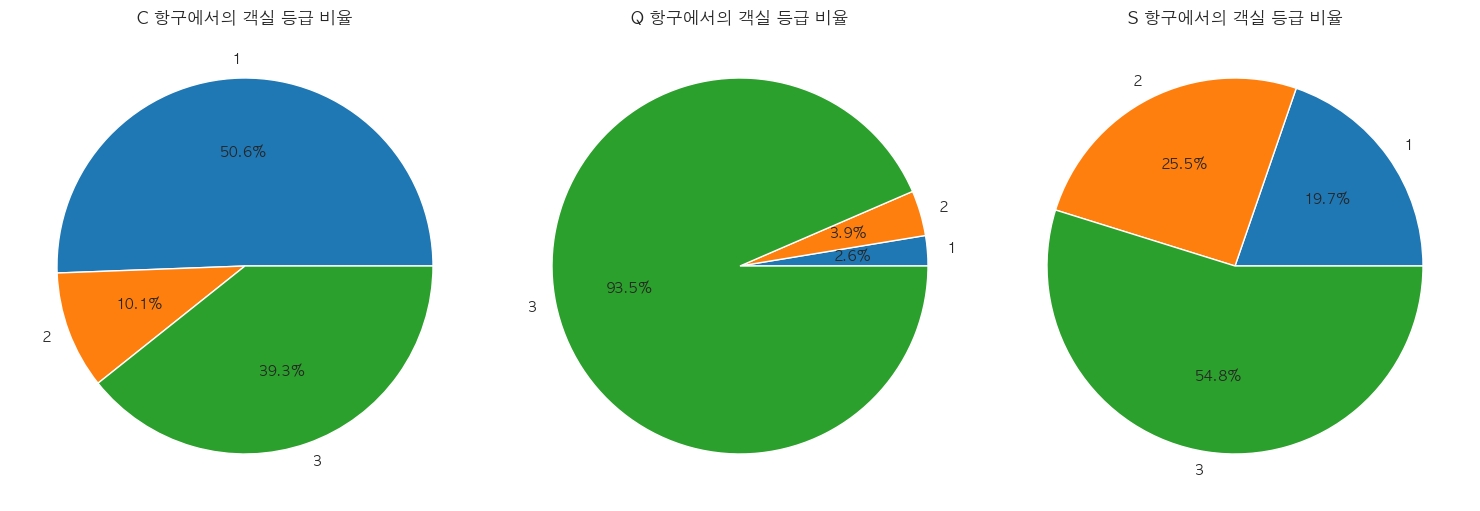

In [15]:
# 항구 내 상대적 비율 확인을 위해 파이 차트로 변환
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

index = 0
for port in ['C', 'Q', 'S']:
    # 각 'Embarked'에서 'Pclass'별 파이 차트 생성
    axs[index].pie(cross_tab.loc[port], labels=cross_tab.columns, autopct='%1.1f%%')
    axs[index].set_title(f'{port} 항구에서의 객실 등급 비율')
    index += 1  # 다음 subplot으로 이동하기 위해 index값 1 증가

# 레이아웃 조정
plt.tight_layout()
plt.show()

- Cheerbourg(France)에서 가장 1등급 객실 승객 비율이 높았으므로, 탑승 항구를 사회적 계층 지표로 볼 수 없다.
- 따라서, 탑승 항구를 사회적 계층 지표에서 제외한다.

### 사회적 계층을 판단하는 데에 사용할 지표 : Pclass(객실등급), Fare(요금)

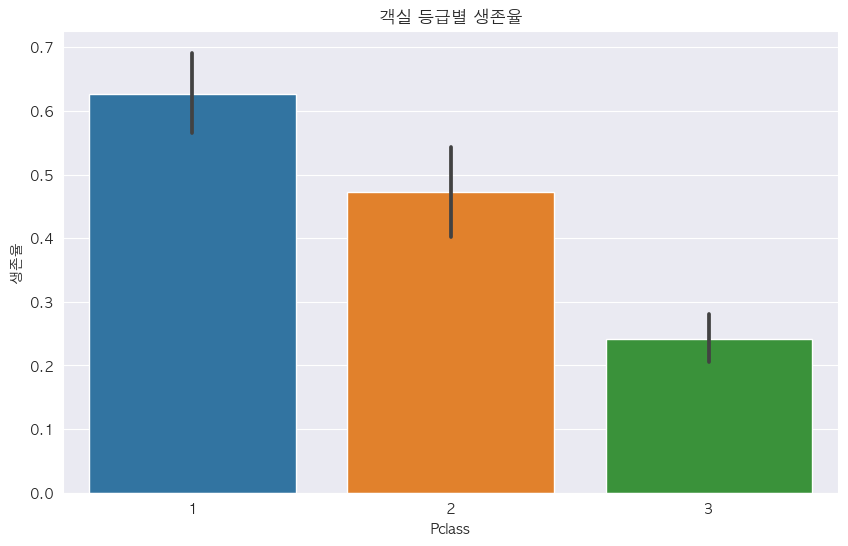

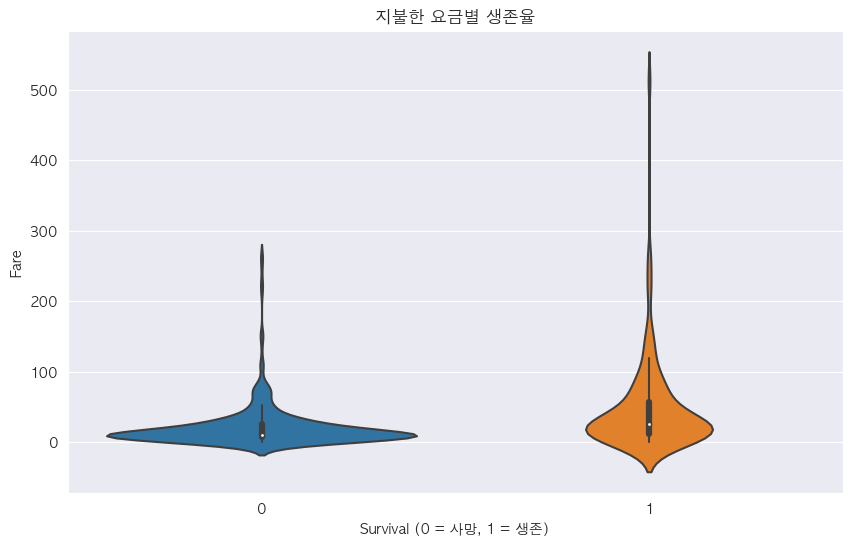

In [16]:
df_new = df.copy()  # 새로운 column을 추가해야 하기 때문에, 원본 데이터프레임을 복사하여 사용

# '사회적 계층' column 추가
# 높은 요금과 낮은 Pclass를 가진 승객이 더 높은 사회 계층에 속한다고 가정

# Pclass별 생존율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df_new)
plt.title('객실 등급별 생존율')
plt.xlabel('Pclass')
plt.ylabel('생존율')
plt.show()

# 생존 상태에 따른 요금 분포를 보여주는 바이올린 플롯
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df_new)
plt.title('지불한 요금별 생존율')
plt.xlabel('Survival (0 = 사망, 1 = 생존)')
plt.ylabel('Fare')
plt.show()


### Insight.
- 객실 등급(Pclass)이 높을 수록 생존율이 높았다.
- 또한 요금이 높을 수록 생존율이 높았다.
- 바이올린 플롯에서는 생존자 그룹과 사망자 그룹 모두 낮은 요금을 낸 사람이 많이 분포해 있으나, 높은 요금을 낸 사람 중의 사망자는 희박함을 확인할 수 있다.
- 즉, 사회적 계층이 높을 수록 생존률이 실제로 높았다. 

## 1-D. 연령이 낮은 경우 사망자가 적으며, 성인의 경우 큰 차이는 없다.

- 데이터를 살펴 보니 Name에 Master라는 호칭이 붙은 사람들이 존재했는데, 공통적으로 나이가 어려 추가 조사를 진행해 보았다.
- 조사 결과 Master는 어린 아이를 의미하는 호칭이었다. 따라서 이들의 나이는 0~20세 사이로 보간하는 것이 더욱 정밀한 보간 방법일 것이다.
- 이외 나이에는 중앙값을 통해 보간을 수행한다.

In [17]:
df_age = df.copy()
# 0-20세 그룹의 중앙값 계산
age_median_master = df_age[(df_age['Age'] >= 0) & (df_age['Age'] <= 20)]['Age'].median()

# 'Master'가 포함된 승객들의 나이 결측치 채우기
df_age.loc[(df_age['Name'].str.contains('Master')) & (df_age['Age'].isnull()), 'Age'] = age_median_master
# 'Master'가 붙지 않은 나머지 결측치 일반 중앙값으로 채우기
df_age['Age'].fillna(df_age['Age'].median(), inplace=True)

df_age['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

- 데이터를 실제로 확인해 보니, 나이에 소수점이 붙어 있는 경우가 있어 나이 값에 모두 반올림을 한 후 분석을 수행한다.

In [18]:
df_age['Age'].round()  # 나이 값 반올림

# 나이를 10살 단위로 묶어 'Age_Group' column 생성
df_age['Age_Group'] = (df_age['Age'] // 10 * 10).astype(str) + ' - ' + (df_age['Age'] // 10 * 10 + 9).astype(str)

# 각 나이 그룹의 승객 수 카운트
age_group_counts = df_age['Age_Group'].value_counts().sort_index()

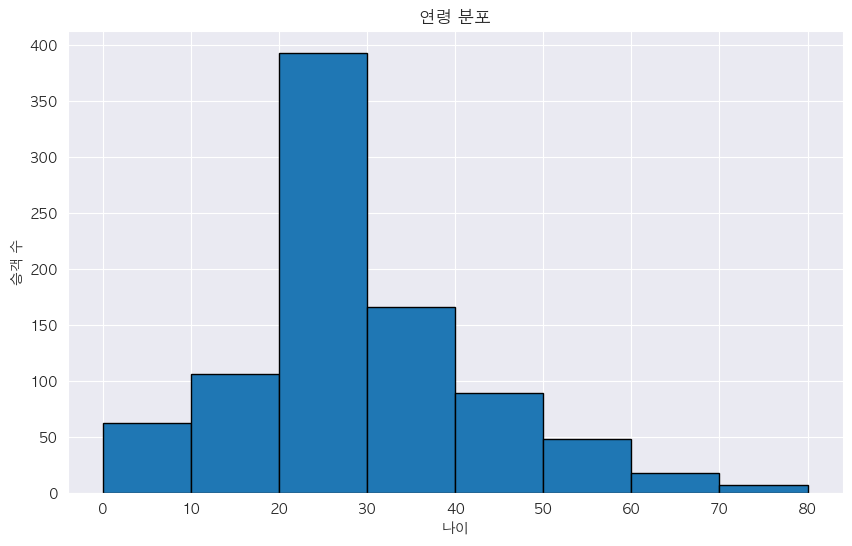

In [19]:
# 사망자와 생존자의 연령 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df_age['Age'], bins=range(0, 90, 10), edgecolor='black')

plt.title('연령 분포')
plt.xlabel('나이')
plt.ylabel('승객 수')
plt.show()

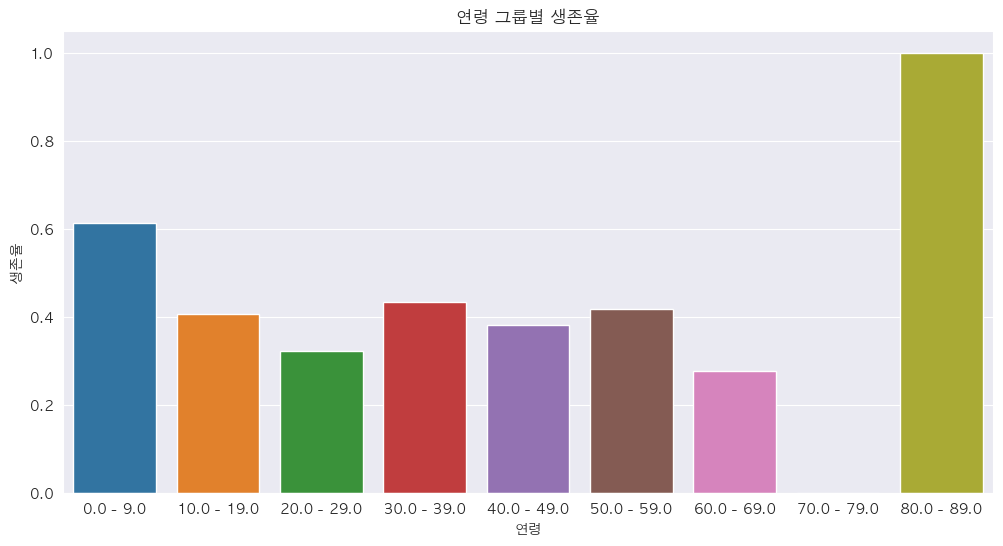

In [20]:
# 각 연령 그룹의 생존율을 계산
survival_rate = df_age.groupby('Age_Group')['Survived'].mean()

# 연령 그룹별 생존율 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values)
plt.title('연령 그룹별 생존율')
plt.xlabel('연령')
plt.ylabel('생존율')
plt.show()

### Insight.
- 실제로 연령이 낮으면 생존율이 비교적 높았고, 성인의 경우 큰 차이는 없었다.
- 다만 10세~19세 연령대에서는 성인의 생존율과 큰 차이를 보이지는 않았으며, 이로 인해 **10대 미만과 10대를 구분하는 것이 적합한 방법임을 검증하였다.**
- 다만 80대 연령대는 생존율이 100%였는데, 실제 데이터를 보니 80대 이상의 승객은 **단 한명**이었고, 그 승객이 구조되어 1로 나타난 것이었다. 따라서 통계적으로 큰 의미를 보이지는 않는다고 할 수 있다.
- 60대의 경우는 그 수가 많지 않음에도 불구하고 생존율이 낮은데, 다른 연령대에 비해 몸이 쇠약하여 탈출이 어려웠을 것으로 추정된다.

# 2. 차별화된 방법론
1. **성별 내에서의 객실 등급별 추가 비교**
- 단순 성별 비교로 보았을 때는 남성이 압도적으로 여성보다 사망 비율이 많은 것으로 나왔으나, 여기서 그치지 않고 추가로 같은 성별 내에서도 객실 등급별로 생존율을 비교해보았다.
2. **탑승 항구와 사회적 계층 지표의 연결**
- 탑승 항구는 곧 탑승 국가와 직결될 것으로 보았고, 당시 세 나라의 국력을 고려하여 새로운 인사이트를 발견하고자 하였다.
- 가장 국력이 강한 나라에서 1등급 객실 승객 비율이 높다면 이는 곧 탑승 항구를 사회적 계층 지표로 사용할 수 있을 것이라고 예측하였다.
- 비록 탑승 항구와 객실 등급 비율이 큰 상관관계가 없었으나(=탑승 항구가 국력을 대표하는 특성이 아니었으나), 다른 데이터에서 EDA를 수행할 때 이와 같은 방법론을 시도하여 강력한 인사이트를 얻어볼 수 있을 것으로 예측한다.
3. **나이의 세분화된 분류**
- 0-20세, 20-60세, 60세 이상으로 분류하는 일반적인 방법을 사용하지 않고, 나이를 더 세분화하여 10살 단위로 쪼개 분류하였다.
- 실제로 0-9세 구간과 10-19세 구간에서 생존율에 유의미한 차이가 발생했기 때문에, 이와 같은 시도가 적합했음을 알 수 있다.
- 또한 추가 조사를 통해 이름에 Master이 붙은 사람의 경우, 어린 아이임을 알 수 있었다. 이들에게는 0~20세 사이 나잇대 데이터의 중앙값으로 보간하였고, 이 덕에 더욱 정밀한 보간이 가능했다. 

# 3. 느낀점

1. **단순 데이터 값 이외 추가 정보 고려의 중요성**
- 실제로 이번 프로젝트를 진행하며, csv 내에 있는 값들 이외에도 많은 정보들이 인사이트를 도출하는 데에 크게 관여하였다.
- 비록 관련성은 찾지 못했으나 탑승 항구의 국가를 보며 당시 국력 및 사회적 계층 정도를 고려하는 아이디어나, 예약자명에 붙은 호칭을 고려하여 보간을 다르게 적용하는 방법 등 기타 배경 지식이 없었다면 도출할 수 없는 아이디어가 많이 존재했다.
- 따라서 앞으로 프로젝트를 진행할 때에도 그 프로젝트의 주변 배경 지식까지도 학습하는 것이 큰 도움이 될 것임을 깨달았다.
2. **통계의 함정에 대한 경각심**
- 1-D 나이에 따른 생존율 분석 과정에서 80대의 생존율이 1로 나왔는데, 실제 80대가 데이터에서 1명밖에 없었음을 확인하지 않았더라면 인사이트 도출에 큰 지장이 생겼을 것이다.
- 이 csv는 그리 크기가 크지 않아 데이터를 직접 확인하는 것이 가능했지만, 데이터가 매우 큰 경우 직접 확인해 보기는 어려울 것이다.
- 따라서 분석 과정에 통계의 함정이 존재하진 않는지 항상 체크해 보아야 함을 깨달았다.
3. **Documentation 숙지의 중요성**
- 프로젝트 진행 중 방법론 조사를 하며 직접 구현해야겠다 생각한 아이디어들이 실제로 라이브러리에 구현된 것들이 많음을 발견했다.
- 무턱대고 코드 짤 아이디어를 구상하기보다, 데이터 사이언티스트들이 자주 사용하는 라이브러리와 메서드를 미리 찾아 보면서 시간을 줄일 수 있는 방법을 찾아야 함을 깨달았다.